## max_depth, min_samples_split 튜닝 + 데이터 비율 보정

In [1]:
# =========================================
# 🌎 Open-World Binary Classification
# Random Forest Model Training & Evaluation
# =========================================
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# -----------------------------------------------------
# 1️⃣ 파일 경로 설정 (경로는 본인 드라이브 구조에 맞게 수정)
# -----------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = "/content/drive/MyDrive/ML_Dataset"

X_train = np.load(f"{BASE_PATH}/X_train_bin.npy")
X_test  = np.load(f"{BASE_PATH}/X_test_bin.npy")
y_train = np.load(f"{BASE_PATH}/y_train_bin.npy")
y_test  = np.load(f"{BASE_PATH}/y_test_bin.npy")

print("✅ Data loaded successfully!")
print("X_train:", X_train.shape, " | y_train:", y_train.shape)
print("X_test :", X_test.shape,  " | y_test :", y_test.shape)

# -----------------------------------------------------
# 2️⃣ 모델 정의 및 학습
# -----------------------------------------------------
rf_bin = RandomForestClassifier(
    n_estimators=300,
    criterion='entropy',
    class_weight='balanced',
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)


print("\n🚀 Training Random Forest model...")
rf_bin.fit(X_train, y_train)
print("✅ Training complete!\n")


Mounted at /content/drive
✅ Data loaded successfully!
X_train: (16500, 25)  | y_train: (16500,)
X_test : (5500, 25)  | y_test : (5500,)

🚀 Training Random Forest model...
✅ Training complete!



In [2]:

# -----------------------------------------------------
# 3️⃣ 예측 및 성능 평가
# -----------------------------------------------------
y_pred = rf_bin.predict(X_test)
y_prob = rf_bin.predict_proba(X_test)[:, 1]  # ROC용 확률 값

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm  = confusion_matrix(y_test, y_pred)

print(f"🎯 Accuracy: {acc:.4f}")
print(f"🎯 ROC-AUC : {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)


🎯 Accuracy: 0.9276
🎯 ROC-AUC : 0.9632

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.70      0.83      0.76       750
         1.0       0.97      0.94      0.96      4750

    accuracy                           0.93      5500
   macro avg       0.83      0.89      0.86      5500
weighted avg       0.94      0.93      0.93      5500

Confusion Matrix:
 [[ 625  125]
 [ 273 4477]]


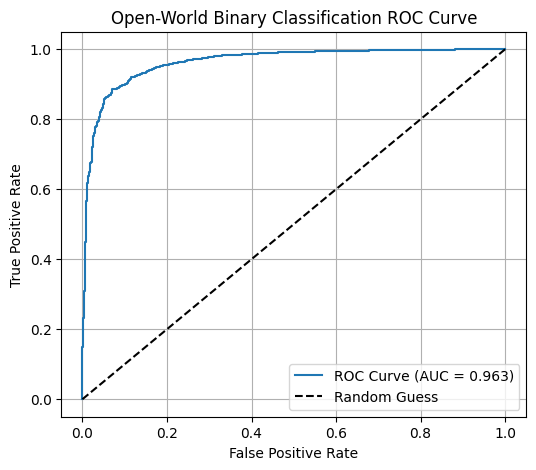

In [3]:

# -----------------------------------------------------
# 4️⃣ ROC Curve 시각화
# -----------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Open-World Binary Classification ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


📊 Normalized Feature Importances (sum = 1.0)
Burst       : 0.5799
Cumulative  : 0.2902
In/Out      : 0.1299


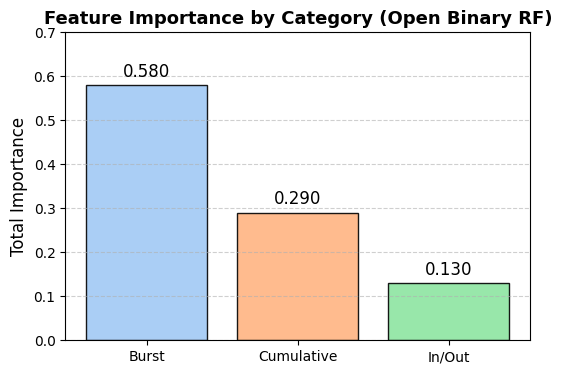

In [5]:
# -----------------------------------------------------
# 🌿 5️⃣ Feature Importance (Normalized by Group Sum)
# -----------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 피처 이름 설정
feature_names = ["Burst", "Cumulative", "In/Out"]

# 피처별 차원 정의 (데이터셋 구조에 따라 조정)
burst_dim = 11
cum_dim = 10
inout_dim = 4

# 피처 중요도 불러오기
importances = rf_bin.feature_importances_

# 그룹별 합산
burst_sum = np.sum(importances[:burst_dim])
cum_sum = np.sum(importances[burst_dim:burst_dim+cum_dim])
inout_sum = np.sum(importances[-inout_dim:])

# 합산 후 정규화 (전체 합이 1이 되도록)
total = burst_sum + cum_sum + inout_sum
feature_group_importances = [
    burst_sum / total,
    cum_sum / total,
    inout_sum / total
]

# 결과 출력
print("📊 Normalized Feature Importances (sum = 1.0)")
for name, val in zip(feature_names, feature_group_importances):
    print(f"{name:<12}: {val:.4f}")

# 시각화
plt.figure(figsize=(6,4))
colors = sns.color_palette("pastel")[0:3]
bars = plt.bar(feature_names, feature_group_importances,
               color=colors, edgecolor='black', alpha=0.9)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f"{height:.3f}", ha='center', va='bottom', fontsize=12)

plt.title("Feature Importance by Category (Open Binary RF)", fontsize=13, fontweight='bold')
plt.ylabel("Total Importance", fontsize=12)
plt.ylim(0, 0.7)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
